In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

import squarify # for tree maps
get_ipython().run_line_magic('matplotlib', 'notebook')

init_notebook_mode(connected=True)

In [ ]:
telecom_data = pd.read_csv("C:\\Users\\surya\\Downloads\\telecom_churn_data.csv")


In [ ]:
telecom_data_col=telecom_data.columns.tolist()
telecom_data_col


['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
telecom_data.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [ ]:
telecom_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
#step4: create separate series for target variable
#dependent variable: 'Churn'
target_variable=telecom_data['Churn']

In [ ]:
#step5: create separate series for unique_id variable
#unique_id
Unique_ID=telecom_data['customerID']


In [ ]:
target_variable

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
Unique_ID

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [ ]:
type(target_variable)

pandas.core.series.Series

In [ ]:
type(Unique_ID)

pandas.core.series.Series

In [ ]:
telecom_data.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [ ]:
#removing unique_id  from dataframe created


telecom_data=telecom_data.drop('customerID',axis=1)

In [ ]:
telecom_data.head()

tenure PhoneService        Contract PaperlessBilling  \
0       1           No  Month-to-month              Yes   
1      34          Yes        One year               No   
2       2          Yes  Month-to-month              Yes   
3      45           No        One year               No   
4       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  \
0           Electronic check           29.85        29.85    No  Female   
1               Mailed check           56.95       1889.5    No    Male   
2               Mailed check           53.85       108.15   Yes    Male   
3  Bank transfer (automatic)           42.30      1840.75    No    Male   
4           Electronic check           70.70       151.65   Yes  Female   

   SeniorCitizen Partner Dependents     MultipleLines InternetService  \
0              0     Yes         No  No phone service             DSL   
1              0      No         No                No             DSL   
2              0      No         No                No             DSL   
3              0      No         No  No phone service             DSL   
4              0      No         No                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies  
0              No  
1              No  
2              No  
3              No  
4              No

In [ ]:
telecom_data.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [ ]:
telecom_data.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
#replacing empty strings with null values
telecom_data = telecom_data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:

#converting datatypes of Totalcharges variable to flaot

telecom_data["TotalCharges"]=telecom_data["TotalCharges"].astype("float64")

In [ ]:
telecom_data.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [ ]:
telecom_data= telecom_data.dropna()
telecom_data

tenure PhoneService        Contract PaperlessBilling  \
0          1           No  Month-to-month              Yes   
1         34          Yes        One year               No   
2          2          Yes  Month-to-month              Yes   
3         45           No        One year               No   
4          2          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038      24          Yes        One year              Yes   
7039      72          Yes        One year              Yes   
7040      11           No  Month-to-month              Yes   
7041       4          Yes  Month-to-month              Yes   
7042      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  \
0              Electronic check           29.85         29.85    No  Female   
1                  Mailed check           56.95       1889.50    No    Male   
2                  Mailed check           53.85        108.15   Yes    Male   
3     Bank transfer (automatic)           42.30       1840.75    No    Male   
4              Electronic check           70.70        151.65   Yes  Female   
...                         ...             ...           ...   ...     ...   
7038               Mailed check           84.80       1990.50    No    Male   
7039    Credit card (automatic)          103.20       7362.90    No  Female   
7040           Electronic check           29.60        346.45    No  Female   
7041               Mailed check           74.40        306.60   Yes    Male   
7042  Bank transfer (automatic)          105.65       6844.50    No    Male   

      SeniorCitizen Partner Dependents     MultipleLines InternetService  \
0                 0     Yes         No  No phone service             DSL   
1                 0      No         No                No             DSL   
2                 0      No         No                No             DSL   
3                 0      No         No  No phone service             DSL   
4                 0      No         No                No     Fiber optic   
...             ...     ...        ...               ...             ...   
7038              0     Yes        Yes               Yes             DSL   
7039              0     Yes        Yes               Yes     Fiber optic   
7040              0     Yes        Yes  No phone service             DSL   
7041              1     Yes         No               Yes     Fiber optic   
7042              0      No         No                No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies  
0                 No  
1                 No  
2                 No  
3                 No  
4                 No  
...              ...  
7038             Yes  
7039             Yes  
7040              No  
7041              No  
7042             Yes  

[7032 rows x 20 columns]

In [ ]:
telecom_data.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
#divide my data to numerical dataframe and categorical dataframe

#step8: create separate numerical dataframe for numerical columns inclusing both float64 and int64 datatypes

telecom_data_num=telecom_data.select_dtypes(include=['float64','int64'])

telecom_data_num_col=telecom_data_num.columns.tolist()

In [ ]:
telecom_data_num_col


['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [ ]:
telecom_data_num.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen
0       1           29.85         29.85              0
1      34           56.95       1889.50              0
2       2           53.85        108.15              0
3      45           42.30       1840.75              0
4       2           70.70        151.65              0

In [ ]:
#step9: create separate categorical dataframe for categorical columns including object datatype

telecom_data_cat=telecom_data.select_dtypes(include=['object'])

telecom_data_cat_col=telecom_data_cat.columns.tolist()

In [ ]:
telecom_data_cat_col

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
total_data=pd.concat([telecom_data_num,telecom_data_cat],axis=1)

In [ ]:
total_data.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen PhoneService  \
0       1           29.85         29.85              0           No   
1      34           56.95       1889.50              0          Yes   
2       2           53.85        108.15              0          Yes   
3      45           42.30       1840.75              0           No   
4       2           70.70        151.65              0          Yes   

         Contract PaperlessBilling              PaymentMethod Churn  gender  \
0  Month-to-month              Yes           Electronic check    No  Female   
1        One year               No               Mailed check    No    Male   
2  Month-to-month              Yes               Mailed check   Yes    Male   
3        One year               No  Bank transfer (automatic)    No    Male   
4  Month-to-month              Yes           Electronic check   Yes  Female   

  Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0     Yes         No  No phone service             DSL             No   
1      No         No                No             DSL            Yes   
2      No         No                No             DSL            Yes   
3      No         No  No phone service             DSL            Yes   
4      No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No

In [ ]:
for column in telecom_data.columns:
    print(column,telecom_data[column].nunique())

tenure 72
PhoneService 2
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3


In [ ]:
for i in telecom_data_cat_col:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(telecom_data[i].unique()),telecom_data[i].unique()))
    print ("---------------------- \n")


Number of unique values in PhoneService column are 2 
 The unique values are ['No' 'Yes']
---------------------- 

Number of unique values in Contract column are 3 
 The unique values are ['Month-to-month' 'One year' 'Two year']
---------------------- 

Number of unique values in PaperlessBilling column are 2 
 The unique values are ['Yes' 'No']
---------------------- 

Number of unique values in PaymentMethod column are 4 
 The unique values are ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---------------------- 

Number of unique values in Churn column are 2 
 The unique values are ['No' 'Yes']
---------------------- 

Number of unique values in gender column are 2 
 The unique values are ['Female' 'Male']
---------------------- 

Number of unique values in Partner column are 2 
 The unique values are ['Yes' 'No']
---------------------- 

Number of unique values in Dependents column are 2 
 The unique values are ['No' 'Yes']
-------------

In [ ]:
for i in telecom_data_num_col:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(telecom_data[i].unique()),telecom_data[i].unique()))
    print ("---------------------- \n")


Number of unique values in tenure column are 72 
 The unique values are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
---------------------- 

Number of unique values in MonthlyCharges column are 1584 
 The unique values are [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
---------------------- 

Number of unique values in TotalCharges column are 6530 
 The unique values are [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
---------------------- 

Number of unique values in SeniorCitizen column are 2 
 The unique values are [0 1]
---------------------- 



In [ ]:
#converting SeniorCitizen to categorical

SeniorCitizen_dict = {0:'NotSeniorCitizen',
           1:'SeniorCitizen',
           }
telecom_data = telecom_data.replace({"SeniorCitizen":SeniorCitizen_dict})


In [ ]:
telecom_data

tenure PhoneService        Contract PaperlessBilling  \
0          1           No  Month-to-month              Yes   
1         34          Yes        One year               No   
2          2          Yes  Month-to-month              Yes   
3         45           No        One year               No   
4          2          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038      24          Yes        One year              Yes   
7039      72          Yes        One year              Yes   
7040      11           No  Month-to-month              Yes   
7041       4          Yes  Month-to-month              Yes   
7042      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  \
0              Electronic check           29.85         29.85    No  Female   
1                  Mailed check           56.95       1889.50    No    Male   
2                  Mailed check           53.85        108.15   Yes    Male   
3     Bank transfer (automatic)           42.30       1840.75    No    Male   
4              Electronic check           70.70        151.65   Yes  Female   
...                         ...             ...           ...   ...     ...   
7038               Mailed check           84.80       1990.50    No    Male   
7039    Credit card (automatic)          103.20       7362.90    No  Female   
7040           Electronic check           29.60        346.45    No  Female   
7041               Mailed check           74.40        306.60   Yes    Male   
7042  Bank transfer (automatic)          105.65       6844.50    No    Male   

         SeniorCitizen Partner Dependents     MultipleLines InternetService  \
0     NotSeniorCitizen     Yes         No  No phone service             DSL   
1     NotSeniorCitizen      No         No                No             DSL   
2     NotSeniorCitizen      No         No                No             DSL   
3     NotSeniorCitizen      No         No  No phone service             DSL   
4     NotSeniorCitizen      No         No                No     Fiber optic   
...                ...     ...        ...               ...             ...   
7038  NotSeniorCitizen     Yes        Yes               Yes             DSL   
7039  NotSeniorCitizen     Yes        Yes               Yes     Fiber optic   
7040  NotSeniorCitizen     Yes        Yes  No phone service             DSL   
7041     SeniorCitizen     Yes         No               Yes     Fiber optic   
7042  NotSeniorCitizen      No         No                No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies  
0                 No  
1                 No  
2                 No  
3                 No  
4                 No  
...              ...  
7038             Yes  
7039             Yes  
7040              No  
7041              No  
7042             Yes  

[7032 rows x 20 columns]

In [ ]:
telecom_data_num=telecom_data.select_dtypes(include=['float64','int64'])

telecom_data_num_col=telecom_data_num.columns.tolist()
telecom_data_num_col


['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
telecom_data_cat=telecom_data.select_dtypes(include=['object'])

telecom_data_cat_col=telecom_data_cat.columns.tolist()
telecom_data_cat_col

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
for i in telecom_data_cat_col:
    telecom_data[i] = telecom_data[i].astype('category')
telecom_data[telecom_data_cat_col].dtypes


PhoneService        category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Churn               category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
dtype: object

In [ ]:
telecom_data_num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

# EXPLORATORY DATA ANALYSIS

#    UNIVARIATE ANALYSIS


In [ ]:
telecom_data.Churn.value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
temp = telecom_data.Churn.value_counts()


In [ ]:
temp.index

CategoricalIndex(['No', 'Yes'], categories=['No', 'Yes'], ordered=False, dtype='category')

In [ ]:
temp.values

array([5163, 1869], dtype=int64)

In [ ]:
trace = go.Bar(x=temp.index,
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name='Churn'
               )
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Churn Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#del temp

### what is Churn distribution !!?

In [ ]:
trace = go.Bar(x=temp.index,
               y= np.round(temp.values/temp.values.sum(),2),
               text = np.round(temp.values/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Churn')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Churn Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#del temp

In [ ]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar


In [ ]:
def plot_bar(col_name):
    # create a table with value counts
    temp = telecom_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)



### categorical feature distribution

In [ ]:
plot_bar('Churn')

In [ ]:
plot_bar('PhoneService')

In [ ]:
plot_bar('Contract')

In [ ]:
plot_bar('PaperlessBilling')

In [ ]:
plot_bar('PaymentMethod')

In [ ]:
plot_bar('gender')

In [ ]:
plot_bar('SeniorCitizen')

In [ ]:
plot_bar('Partner')

In [ ]:
plot_bar('Dependents')

In [ ]:
plot_bar('MultipleLines')

In [ ]:
plot_bar('InternetService')

In [ ]:
plot_bar('OnlineSecurity')

In [ ]:
plot_bar('OnlineBackup')

In [ ]:
plot_bar('DeviceProtection')

In [ ]:
plot_bar('TechSupport')

In [ ]:
plot_bar('StreamingTV')

In [ ]:
plot_bar('StreamingMovies')

<IPython.core.display.Javascript object>


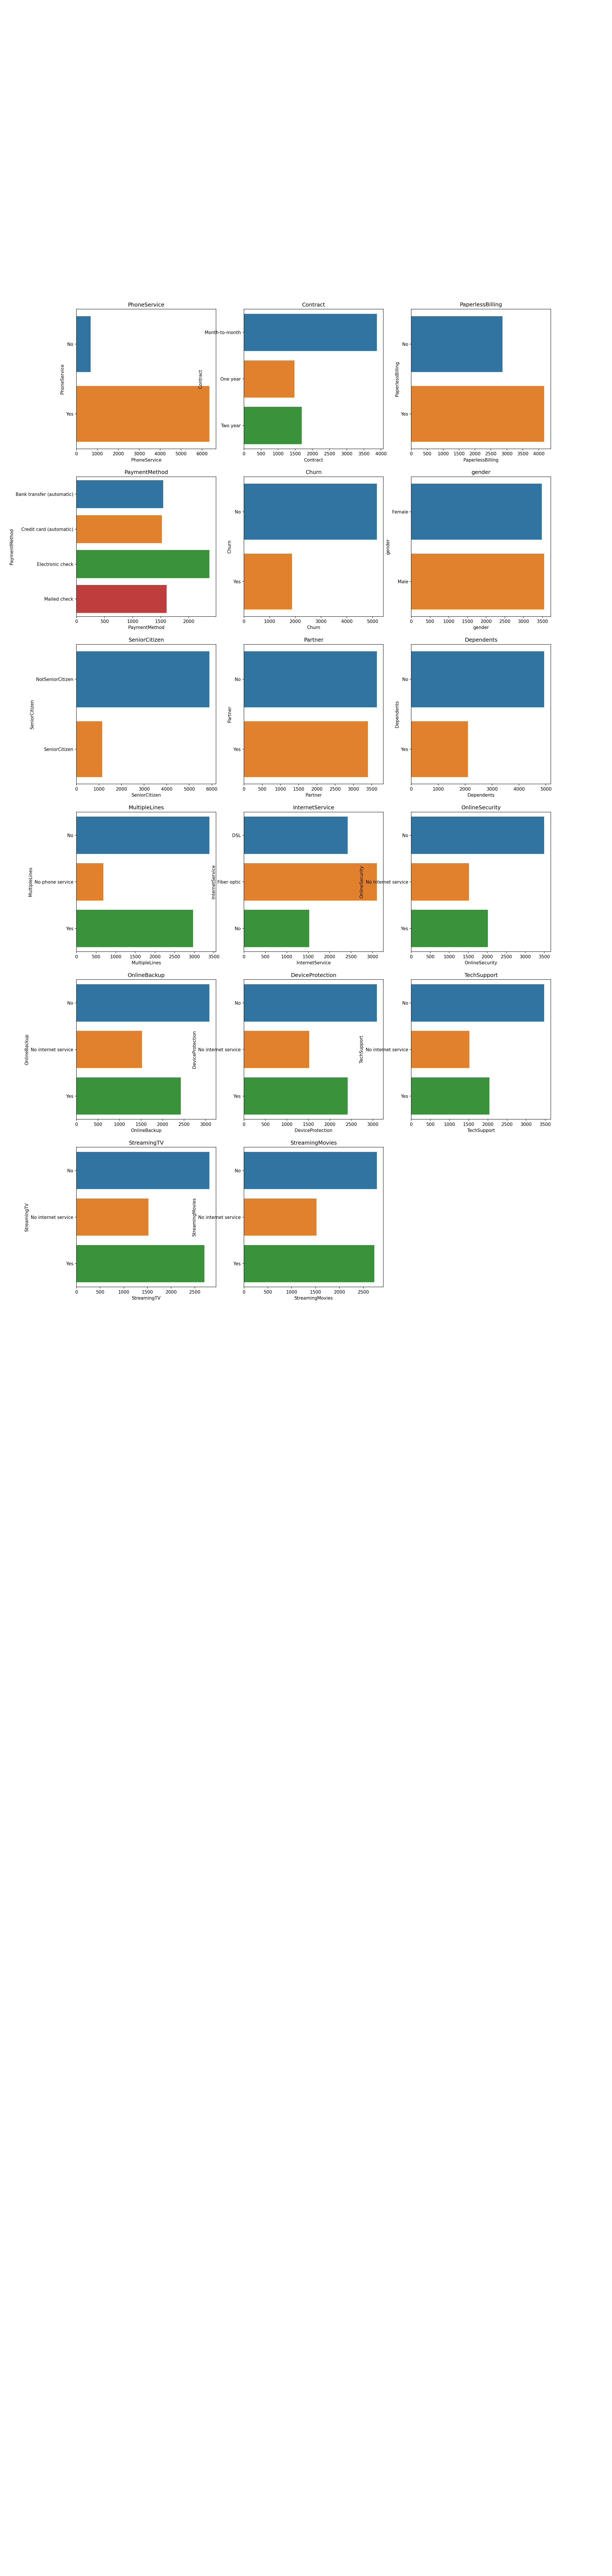

In [ ]:
#check count based on categorical features
plt.figure(figsize=(19,80), facecolor='white')
plotnumber =1
for i in telecom_data_cat_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=i,data=telecom_data)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()


### Numerical feature distribution

In [ ]:
data = [go.Histogram(x=telecom_data.tenure,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of tenure")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [ ]:
data = [go.Histogram(x=telecom_data.MonthlyCharges,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of MonthlyCharges")
fig = go.Figure(data= data, layout=layout)
iplot(fig)


In [ ]:
data = [go.Histogram(x=telecom_data.TotalCharges,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of TotalCharges")
fig = go.Figure(data= data, layout=layout)
iplot(fig)


In [ ]:
max(telecom_data['MonthlyCharges'])


118.75

In [ ]:
telecom_data['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
#converting datatypes of Totalcharges variable to flaot

telecom_data["MonthlyCharges"]=telecom_data["MonthlyCharges"].astype("int64")

In [ ]:
telecom_data['Mcharge_Bins'] = np.digitize(telecom_data.MonthlyCharges,list(range(0,telecom_data.MonthlyCharges.max()+10,20)),right=True)


In [ ]:
k=list(range(0,telecom_data.MonthlyCharges.max()+10,20))
k

[0, 20, 40, 60, 80, 100, 120]

In [ ]:
telecom_data['Mcharge_Bins'].value_counts()

5    1721
4    1550
1    1155
3    1098
6     791
2     717
Name: Mcharge_Bins, dtype: int64

In [ ]:
telecom_data['Mcharge_Bins'] = telecom_data['Mcharge_Bins'].replace(to_replace=[1,2,3,4,5,6],
                                                        value=[20, 40, 60, 80, 100, 120])
#['Bin1','Bin2','Bin3','Bin4','Bin5','Bin6'])

In [ ]:
telecom_data[['MonthlyCharges','Mcharge_Bins']].head(45)

MonthlyCharges  Mcharge_Bins
0               29            40
1               56            60
2               53            60
3               42            60
4               70            80
5               99           100
6               89           100
7               29            40
8              104           120
9               56            60
10              49            60
11              18            20
12             100           100
13             103           120
14             105           120
15             113           120
16              20            20
17             106           120
18              55            60
19              90           100
20              39            40
21              19            20
22              20            20
23              59            60
24              59            60
25              55            60
26              99           100
27              30            40
28              90           100
29              64            80
30              96           100
31              95           100
32              66            80
33              20            20
34              45            60
35              99           100
36              69            80
37              74            80
38             106           120
39              97           100
40              49            60
41              69            80
42              20            20
43              79            80
44              76            80

In [ ]:
temp = telecom_data['Mcharge_Bins'].value_counts()
temp=temp.sort_index()

In [ ]:
trace1 = go.Bar(x = temp.index,
               y = (temp.values.astype(float)/sum(temp.values))*100,
                text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),2)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
                textposition = 'auto',
               name = 'Income_Bins')
data = [trace1]
# these are used to define the layout options

layout = generate_layout_bar('Mcharge_Bins')

fig = go.Figure(data=data, layout=layout)
iplot(fig)
print(list(range(0,telecom_data.MonthlyCharges.max()+10,20)))

[0, 20, 40, 60, 80, 100, 120]


In [ ]:
telecom_data.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Mcharge_Bins'],
      dtype='object')

<IPython.core.display.Javascript object>


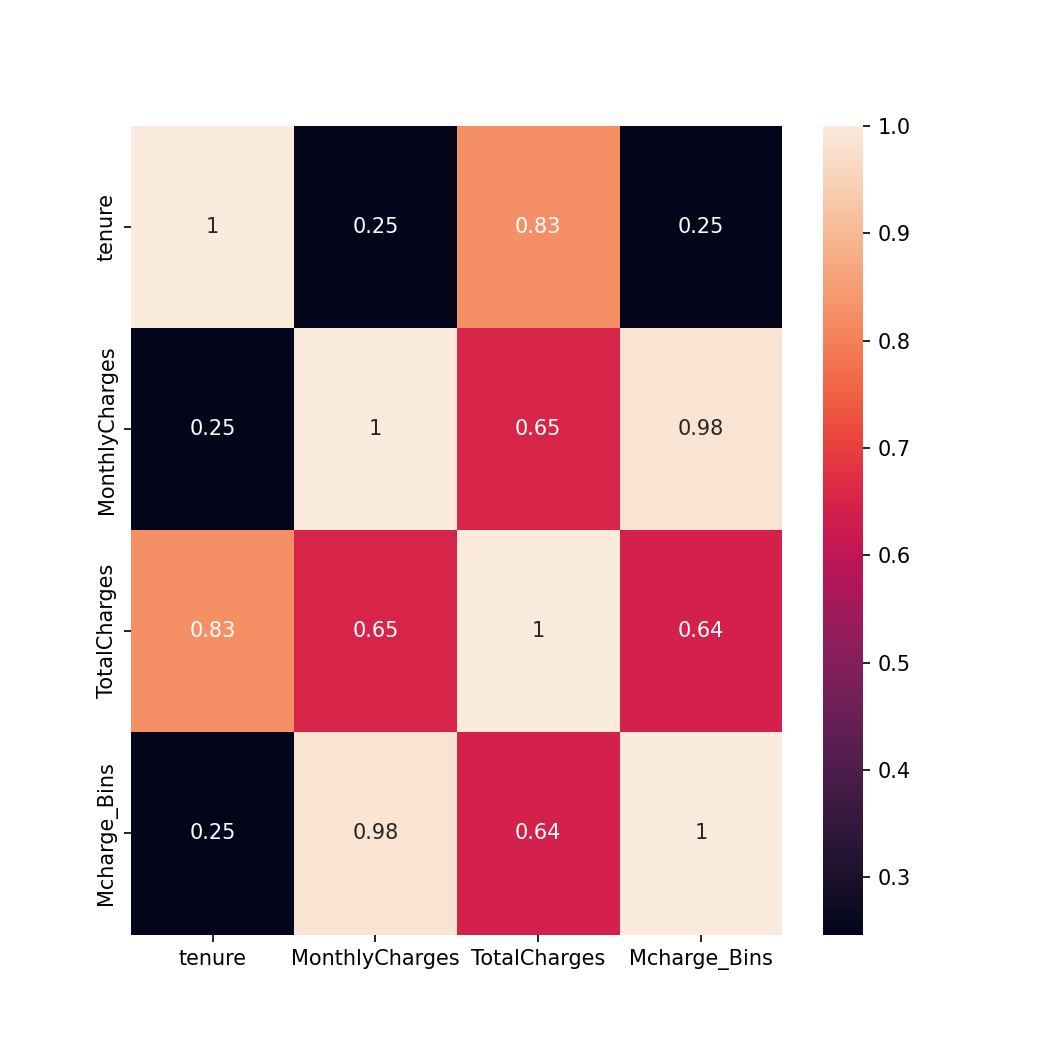

<AxesSubplot:>

In [ ]:
## Checking for correlation
cor_mat=telecom_data.corr()
fig = plt.figure(figsize=(7,7))
sns.heatmap(cor_mat,annot=True)

<IPython.core.display.Javascript object>


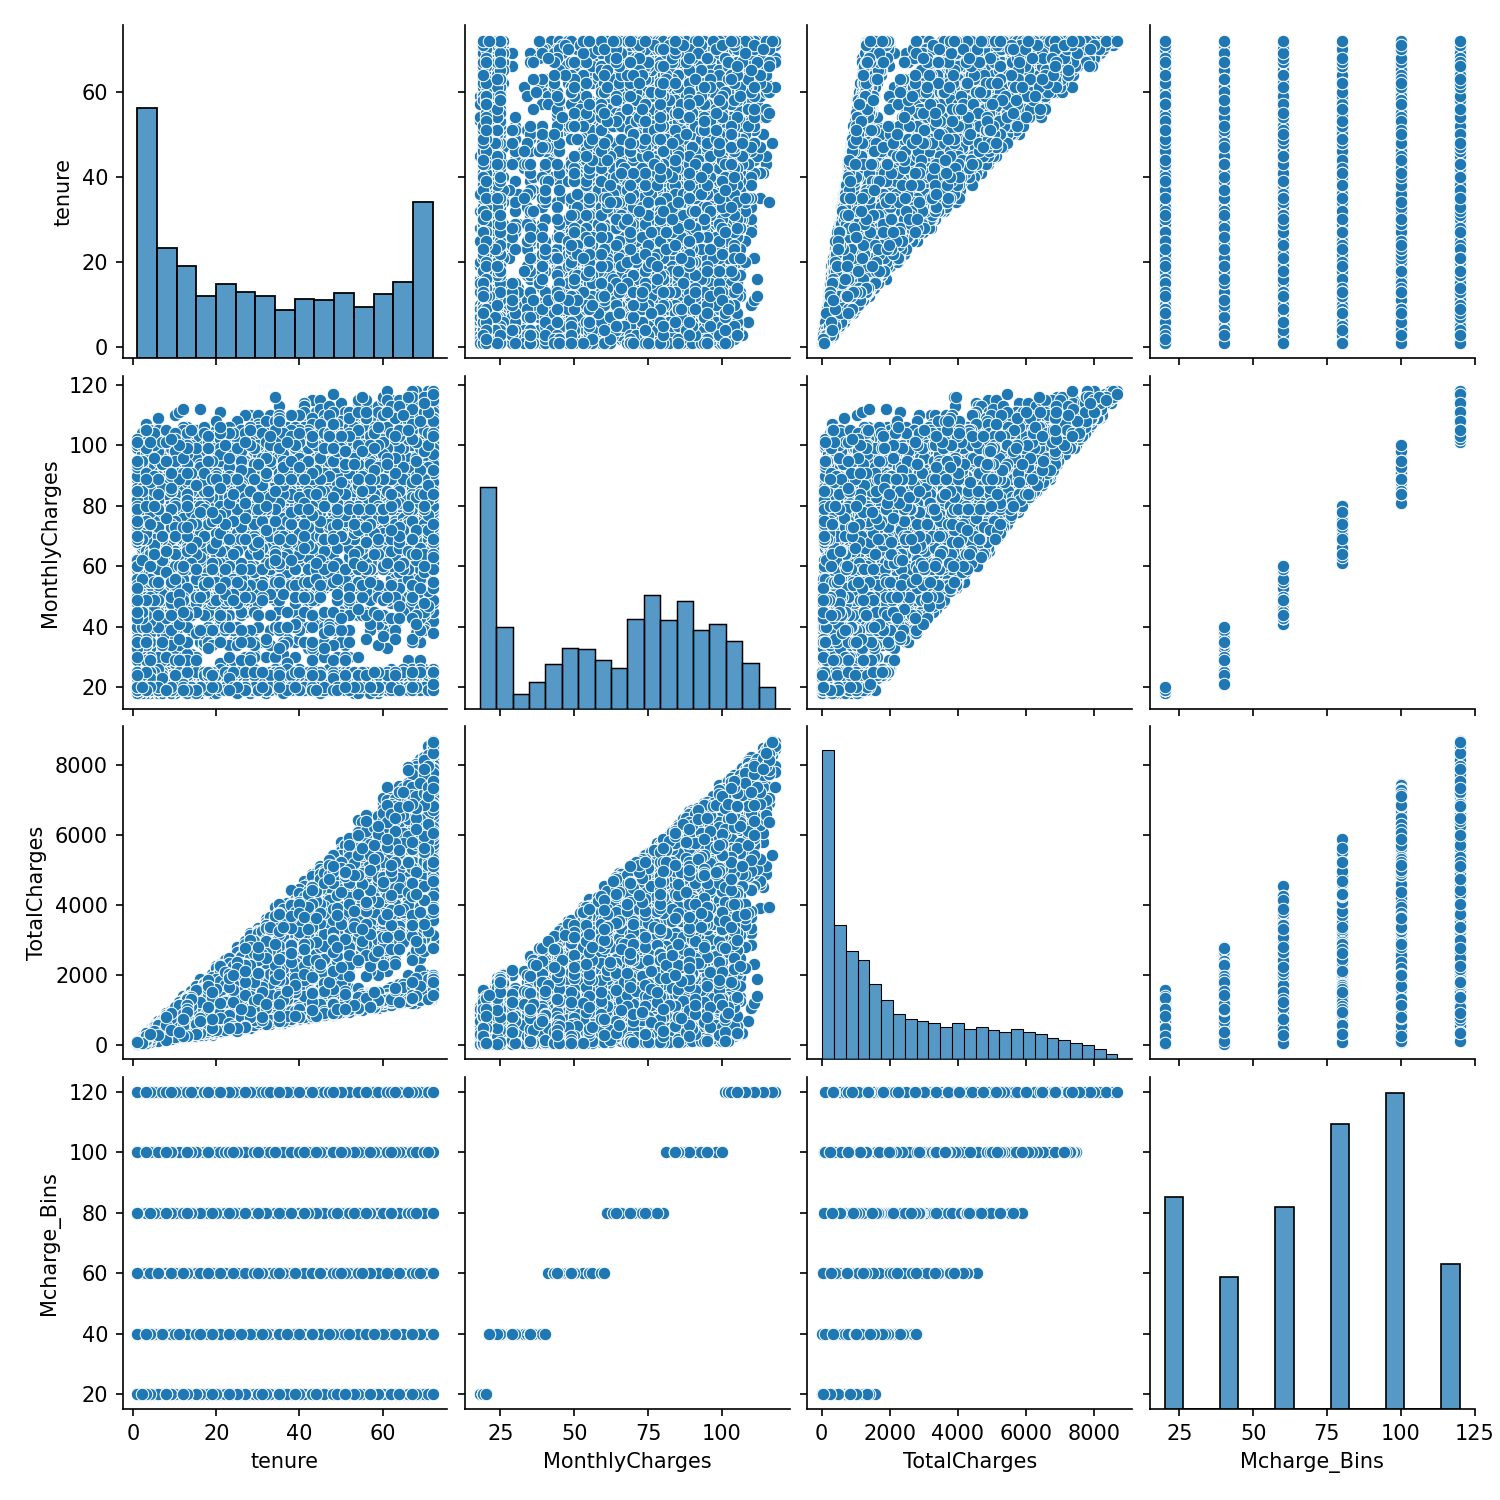

In [ ]:
# importing packages
import seaborn
import pandas
 
# load the csv
#data = pandas.read_csv("nba.csv")
 
# pairplot
seaborn.pairplot(telecom_data)

# Bivariate analysis

In [ ]:
## gender and churn

gender_Churn = telecom_data.groupby(['gender','Churn']).size().reset_index()
gender_Churn.columns = ['Gender','Churn','Count']
gender_Churn

Gender Churn  Count
0  Female    No   2544
1  Female   Yes    939
2    Male    No   2619
3    Male   Yes    930

In [ ]:
trace1 = go.Bar(x = gender_Churn.Gender[gender_Churn.Churn=='Yes'],
               y = gender_Churn.Count[gender_Churn.Churn=='Yes'],
                text = gender_Churn.Count[gender_Churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = gender_Churn.Gender[gender_Churn.Churn=='No'],
               y = gender_Churn.Count[gender_Churn.Churn=='No'],
                 text = gender_Churn.Count[gender_Churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Gender and Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
#senior citizen and churn

SeniorCitizen_Churn = telecom_data.groupby(['SeniorCitizen','Churn']).size().reset_index()
SeniorCitizen_Churn.columns = ['SeniorCitizen','Churn','Count']
SeniorCitizen_Churn

trace1 = go.Bar(x = SeniorCitizen_Churn.SeniorCitizen[SeniorCitizen_Churn.Churn=='Yes'],
               y = SeniorCitizen_Churn.Count[SeniorCitizen_Churn.Churn=='Yes'],
                text = SeniorCitizen_Churn.Count[SeniorCitizen_Churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = SeniorCitizen_Churn.SeniorCitizen[SeniorCitizen_Churn.Churn=='No'],
               y = SeniorCitizen_Churn.Count[SeniorCitizen_Churn.Churn=='No'],
                 text = SeniorCitizen_Churn.Count[SeniorCitizen_Churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'SeniorCitizen and Attrition')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
telecom_data['SeniorCitizen'].value_counts()

NotSeniorCitizen    5890
SeniorCitizen       1142
Name: SeniorCitizen, dtype: int64

In [ ]:
def plot_bi_variant_target(telecom_data,feature,target,req):
    df_target_feature = telecom_data.groupby([feature,target]).size().reset_index()
    df_target_feature.columns = [feature,target,'Count']
    df_target_feature=df_target_feature.merge(df_target_feature.groupby(feature)['Count'].sum().reset_index().rename(columns={'Count':'feature_count'}),on=feature,how='left')

    df_target_feature=df_target_feature.merge(df_target_feature.groupby(target)['Count'].sum().reset_index().rename(columns={'Count':'target_count'}),on=target,how='left')


    df_target_feature['Count_ratio_feature']=df_target_feature['Count']/df_target_feature['feature_count']
    
    data=[]
    if req=='percentage':
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count_ratio_feature'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count_ratio_feature'],2),
                         textposition = 'auto',name = i)
            data.append(trace)
    else:
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count'],2),
                         textposition = 'auto',name = i)
            data.append(trace)


    layout = go.Layout(width = 800,height = 600,title = feature +' and '+target+' '+req)
    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)


### More SeniorCitizens are Churned..!!?

In [ ]:
plot_bi_variant_target(telecom_data,'SeniorCitizen','Churn','percentage')

In [ ]:
plot_bi_variant_target(telecom_data,'Partner','Churn','percentage')

In [ ]:
telecom_data['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'Dependents','Churn','percentage')

In [ ]:
telecom_data['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'PhoneService','Churn','percentage')

In [ ]:
telecom_data['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
telecom_data['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'MultipleLines','Churn','percentage')

In [ ]:
plot_bi_variant_target(telecom_data,'InternetService','Churn','percentage')

In [ ]:
telecom_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'OnlineSecurity','Churn','percentage')

In [ ]:
telecom_data['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'OnlineBackup','Churn','percentage')

In [ ]:
telecom_data['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'DeviceProtection','Churn','percentage')

In [ ]:
telecom_data['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'TechSupport','Churn','percentage')

In [ ]:
telecom_data['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'StreamingTV','Churn','percentage')

In [ ]:
telecom_data['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'StreamingMovies','Churn','percentage')

In [ ]:
telecom_data['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

###  Customers who use the telecom services for  more years  tend to Churn. 
### Verify if this is true.(Contract  and Churn)


In [ ]:
plot_bi_variant_target(telecom_data,'Contract','Churn','percentage')

In [ ]:
telecom_data['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'PaperlessBilling','Churn','percentage')

In [ ]:
telecom_data['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [ ]:
plot_bi_variant_target(telecom_data,'PaymentMethod','Churn','percentage')

In [ ]:
telecom_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
def plot_bi_variant_target_box(telecom_data,feature,target):    
    
    data=[]    
    for i in telecom_data[target].unique():
        trace=go.Box(y=telecom_data[telecom_data[target]==i][feature],name = i)
        data.append(trace)


    layout = go.Layout(width = 800,height = 600,title = feature +' and '+target)
    fig = go.Figure(data=data, layout=layout)
    return iplot(fig) 


### HYPOTHESIS is that the customer using the service for the longest time would like to Churn.
### Prove the hypothesis is wrong.

In [ ]:
plot_bi_variant_target_box(telecom_data,'tenure','Churn')

In [ ]:
plot_bi_variant_target_box(telecom_data,'TotalCharges','Churn')

## Does raise in monthly charges effect the Churning ?

In [ ]:
plot_bi_variant_target_box(telecom_data,'MonthlyCharges','Churn')

In [ ]:

telecom_data[['PaymentMethod','PaperlessBilling']].head()

PaymentMethod PaperlessBilling
0           Electronic check              Yes
1               Mailed check               No
2               Mailed check              Yes
3  Bank transfer (automatic)               No
4           Electronic check              Yes

In [ ]:
telecom_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
telecom_data['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [ ]:
telecom_data.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Mcharge_Bins'],
      dtype='object')

In [ ]:
def boxplot_function(dataframe,x_value,y_value,title_size=15,label_size=10,figsize=(15,10),palette="viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x=x_value,y=y_value,data=dataframe,palette=palette)
    plt.xlabel("{} value".format(x_value),fontsize=label_size)
    plt.ylabel("{} value".format(y_value),fontsize=label_size)
    plt.title("{} Vs {} Boxplot".format(x_value,y_value),fontsize=title_size)

<IPython.core.display.Javascript object>


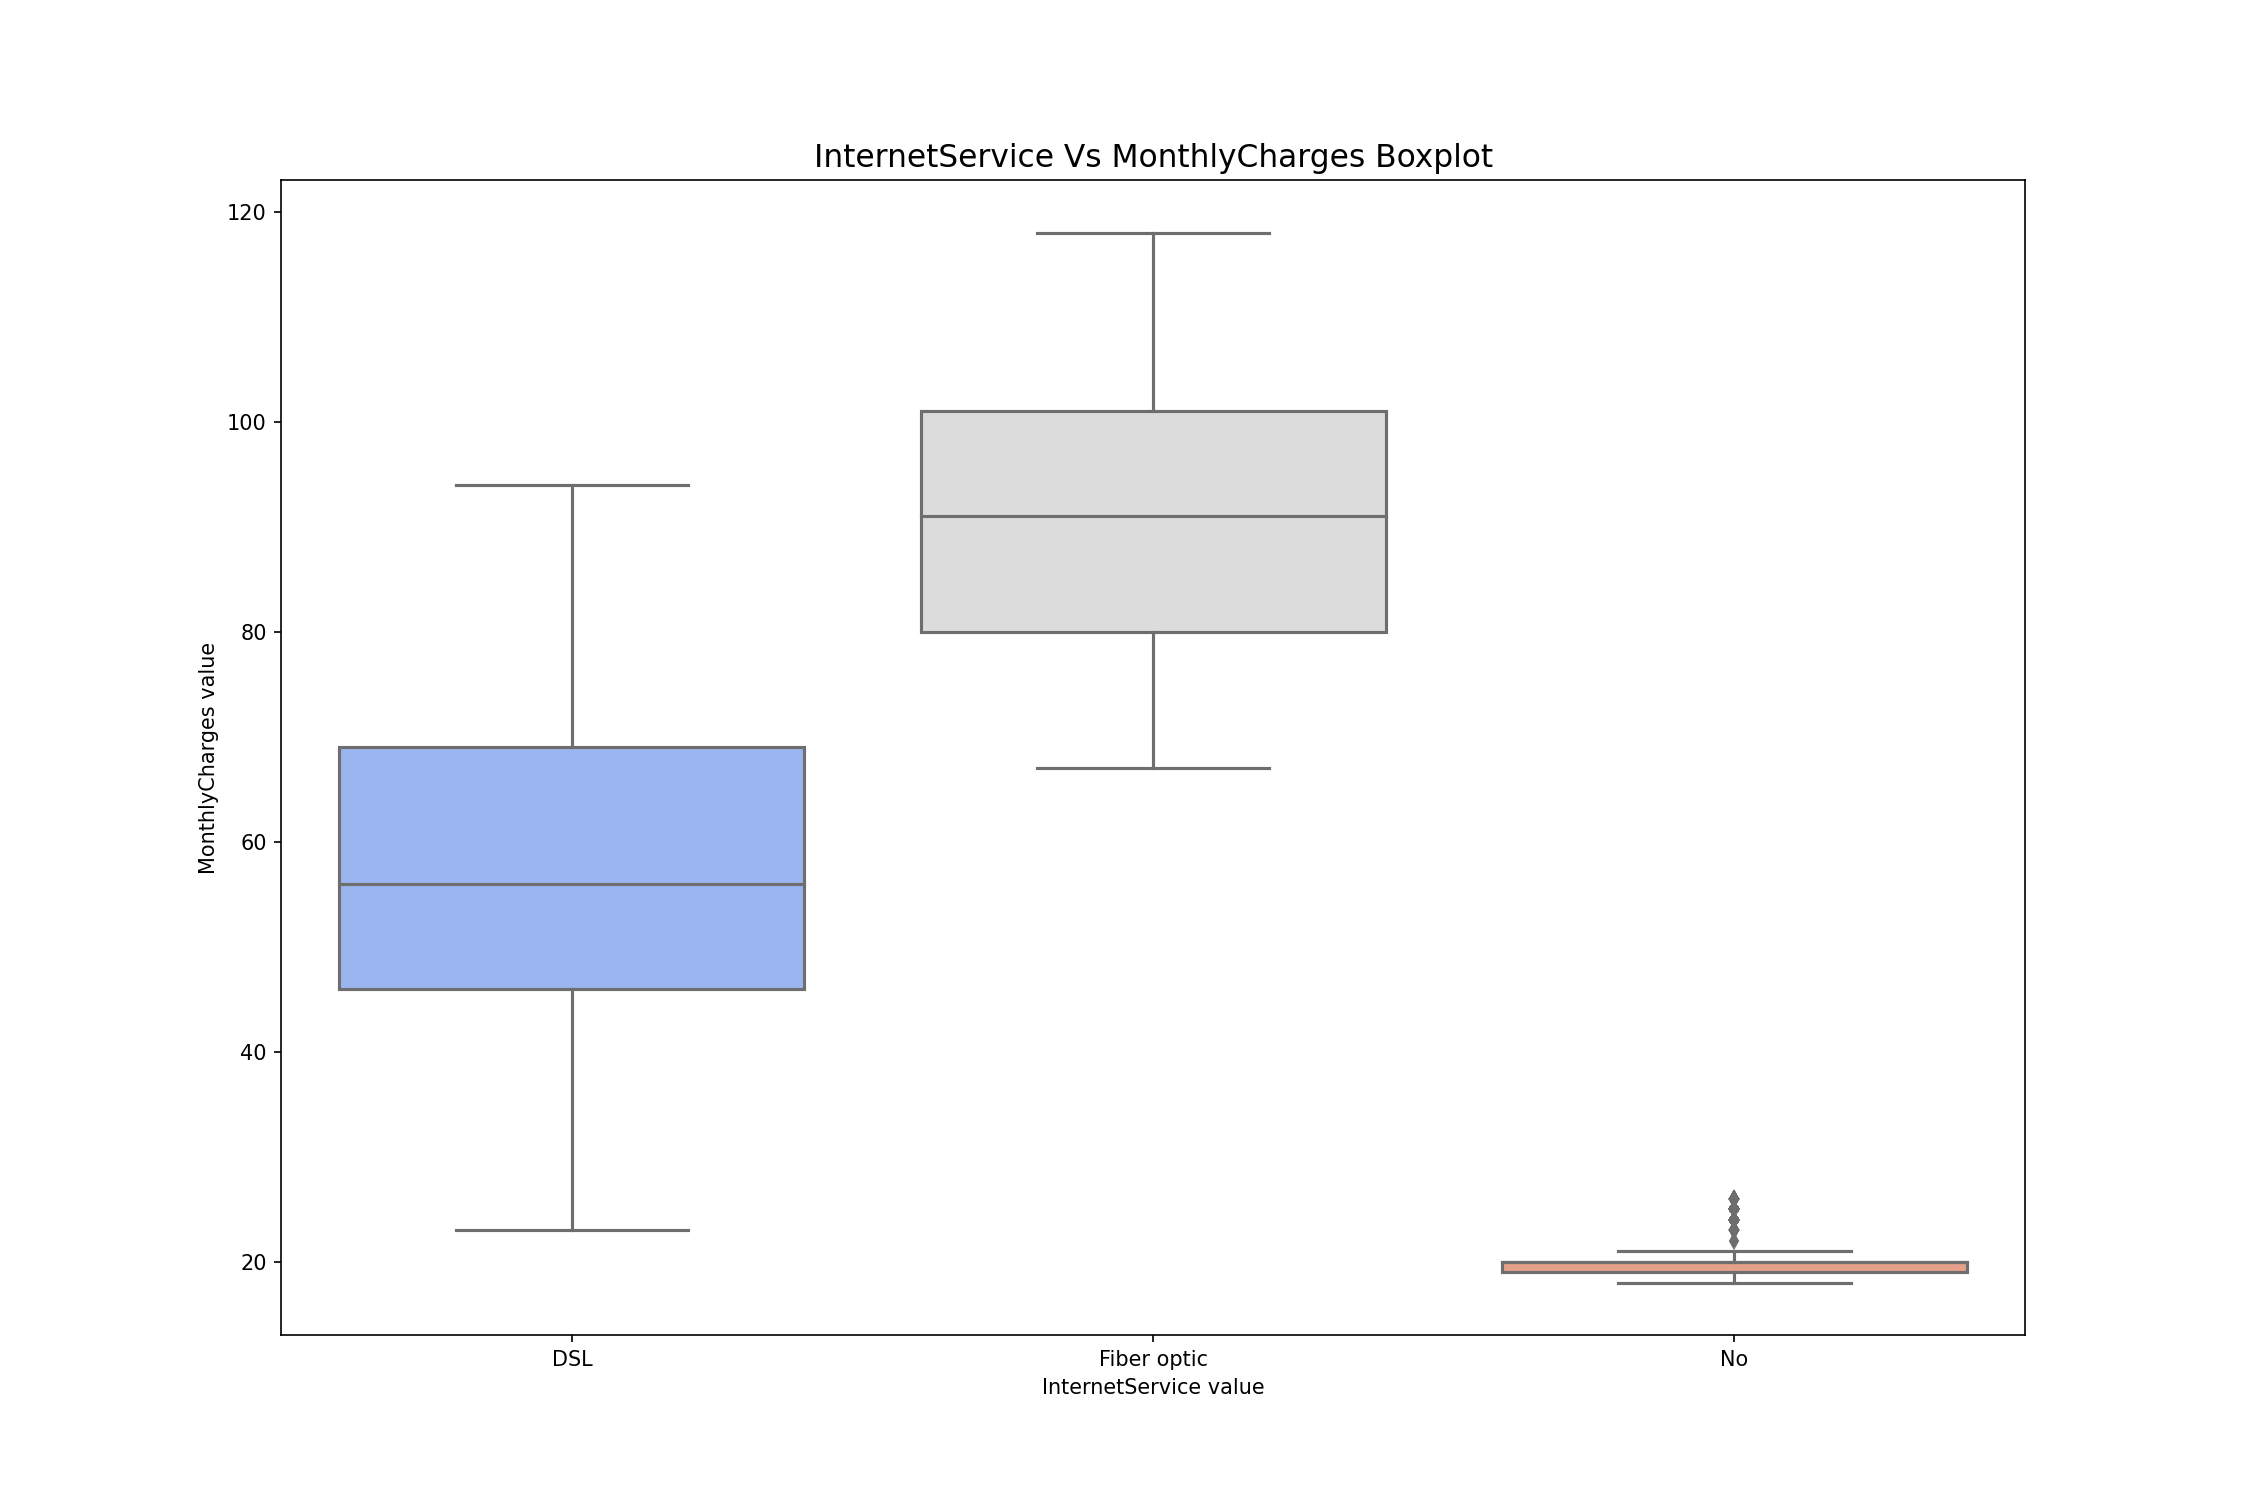

In [ ]:
boxplot_function(dataframe=telecom_data,x_value="InternetService",y_value="MonthlyCharges",palette="coolwarm")
plt.show()

<IPython.core.display.Javascript object>


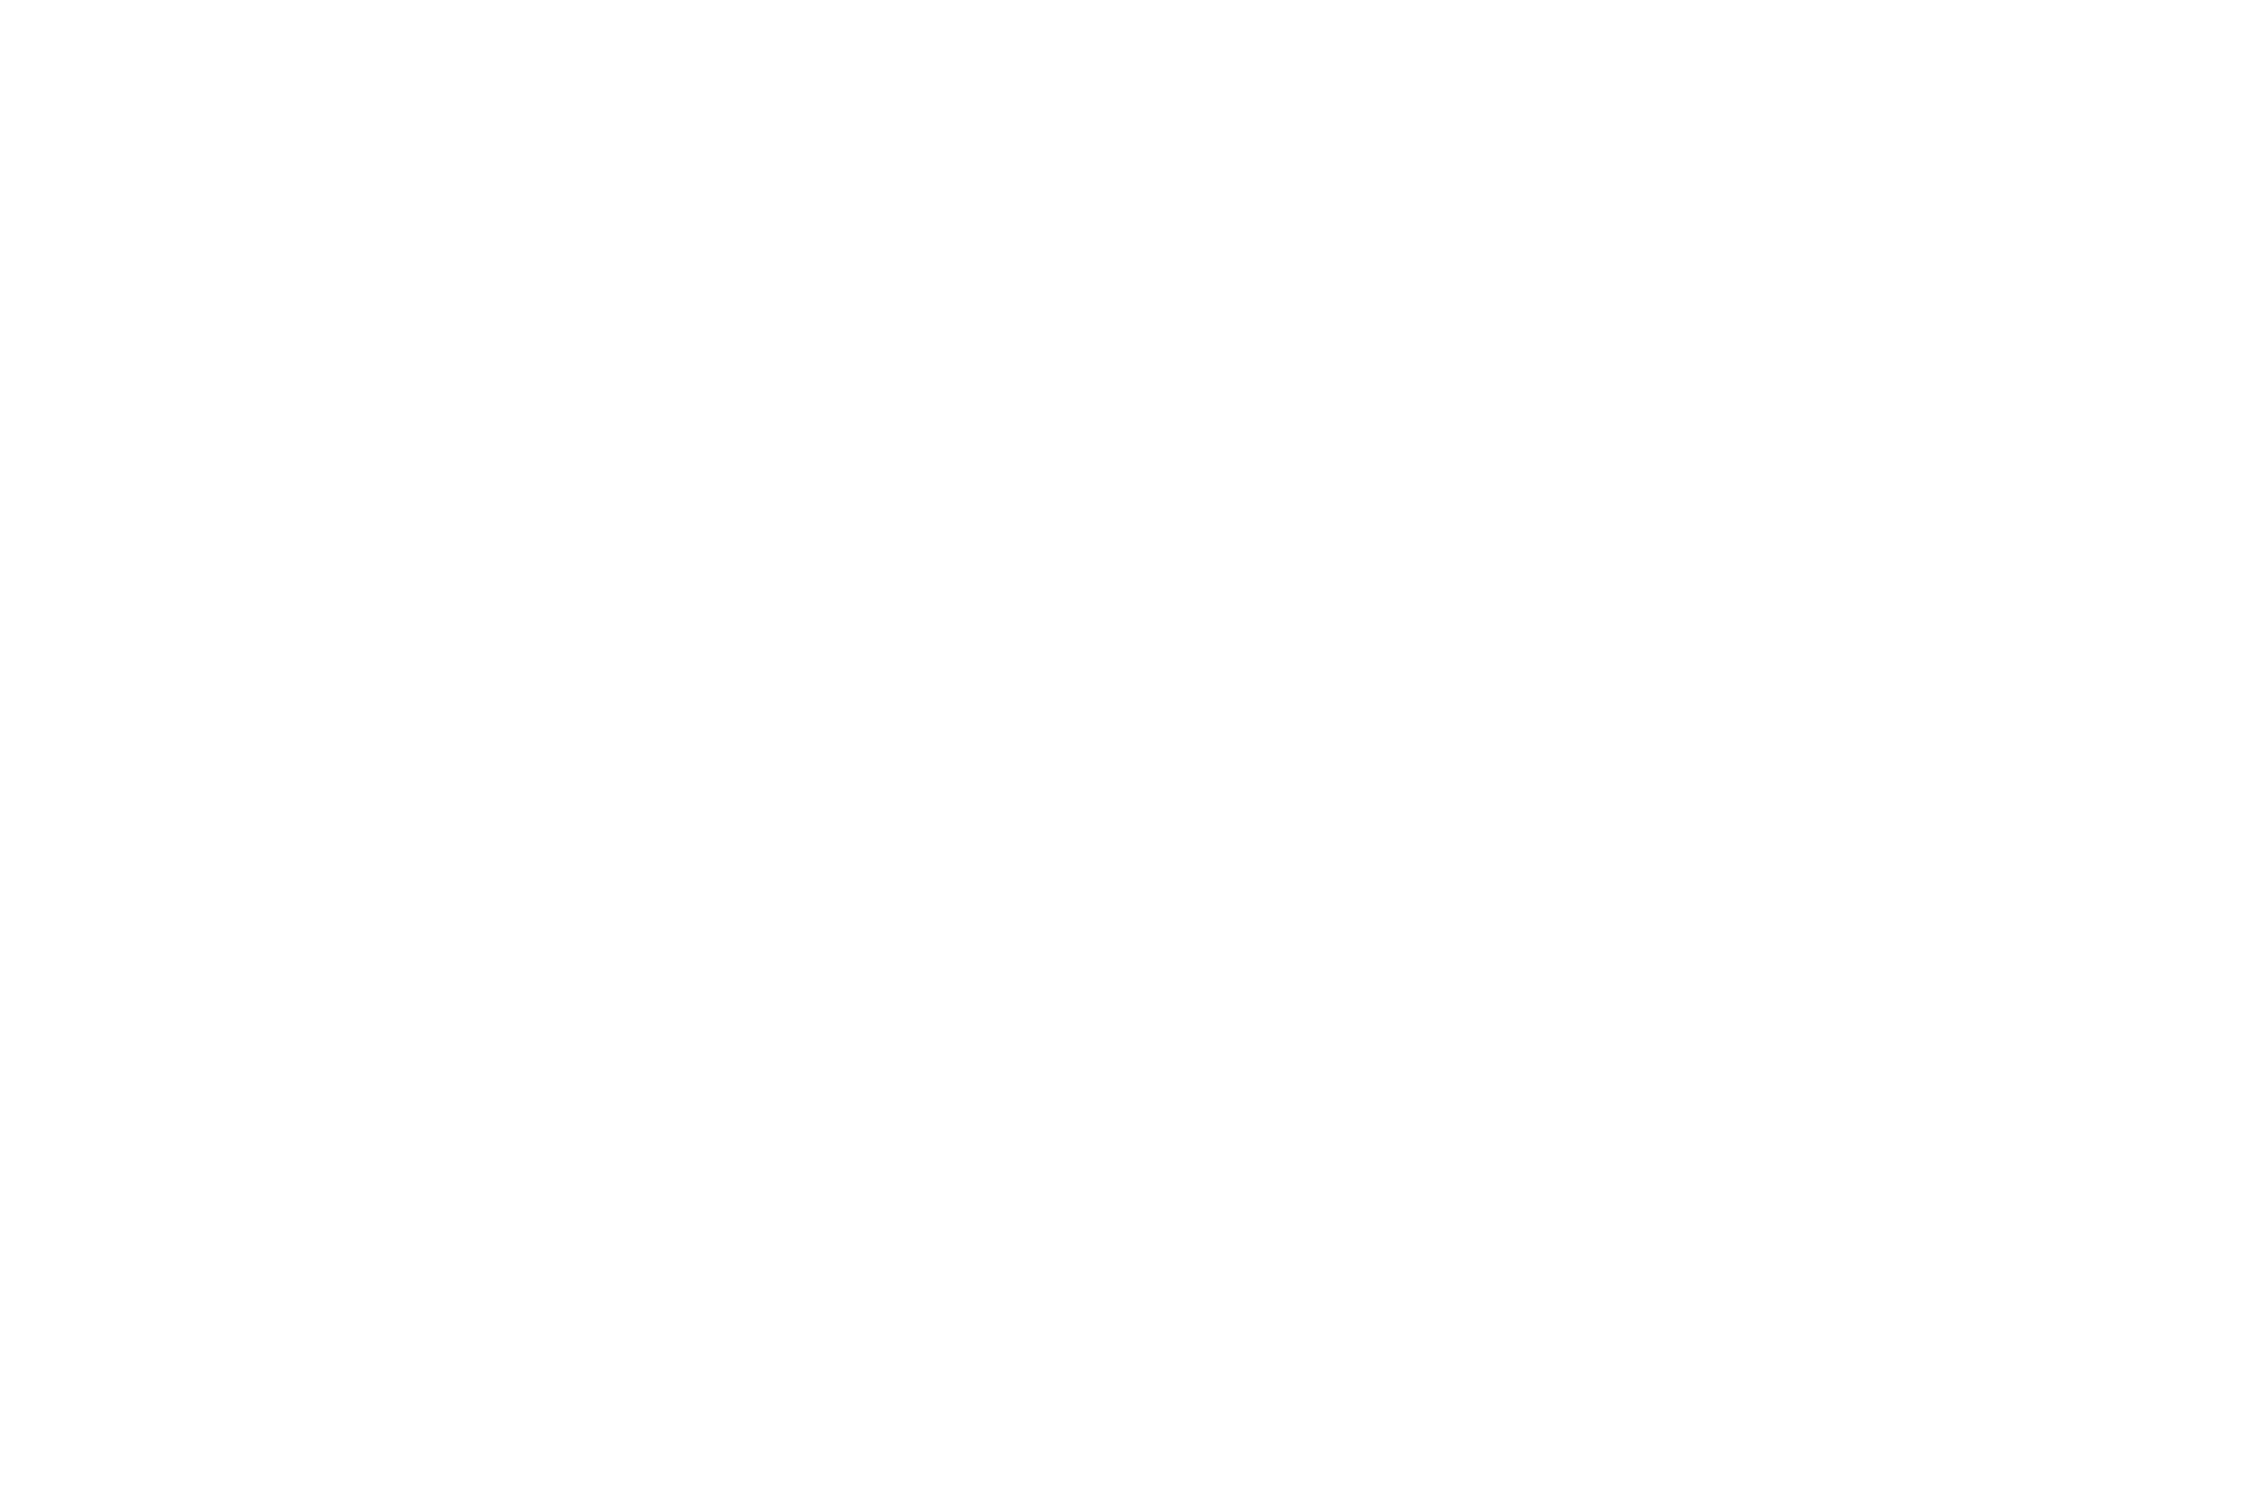

ValueError: Could not interpret input 'SeniorCitizens'

In [ ]:
boxplot_function(dataframe=telecom_data,x_value="SeniorCitizens",y_value="TotalCharges",palette="coolwarm")
plt.show()

<IPython.core.display.Javascript object>


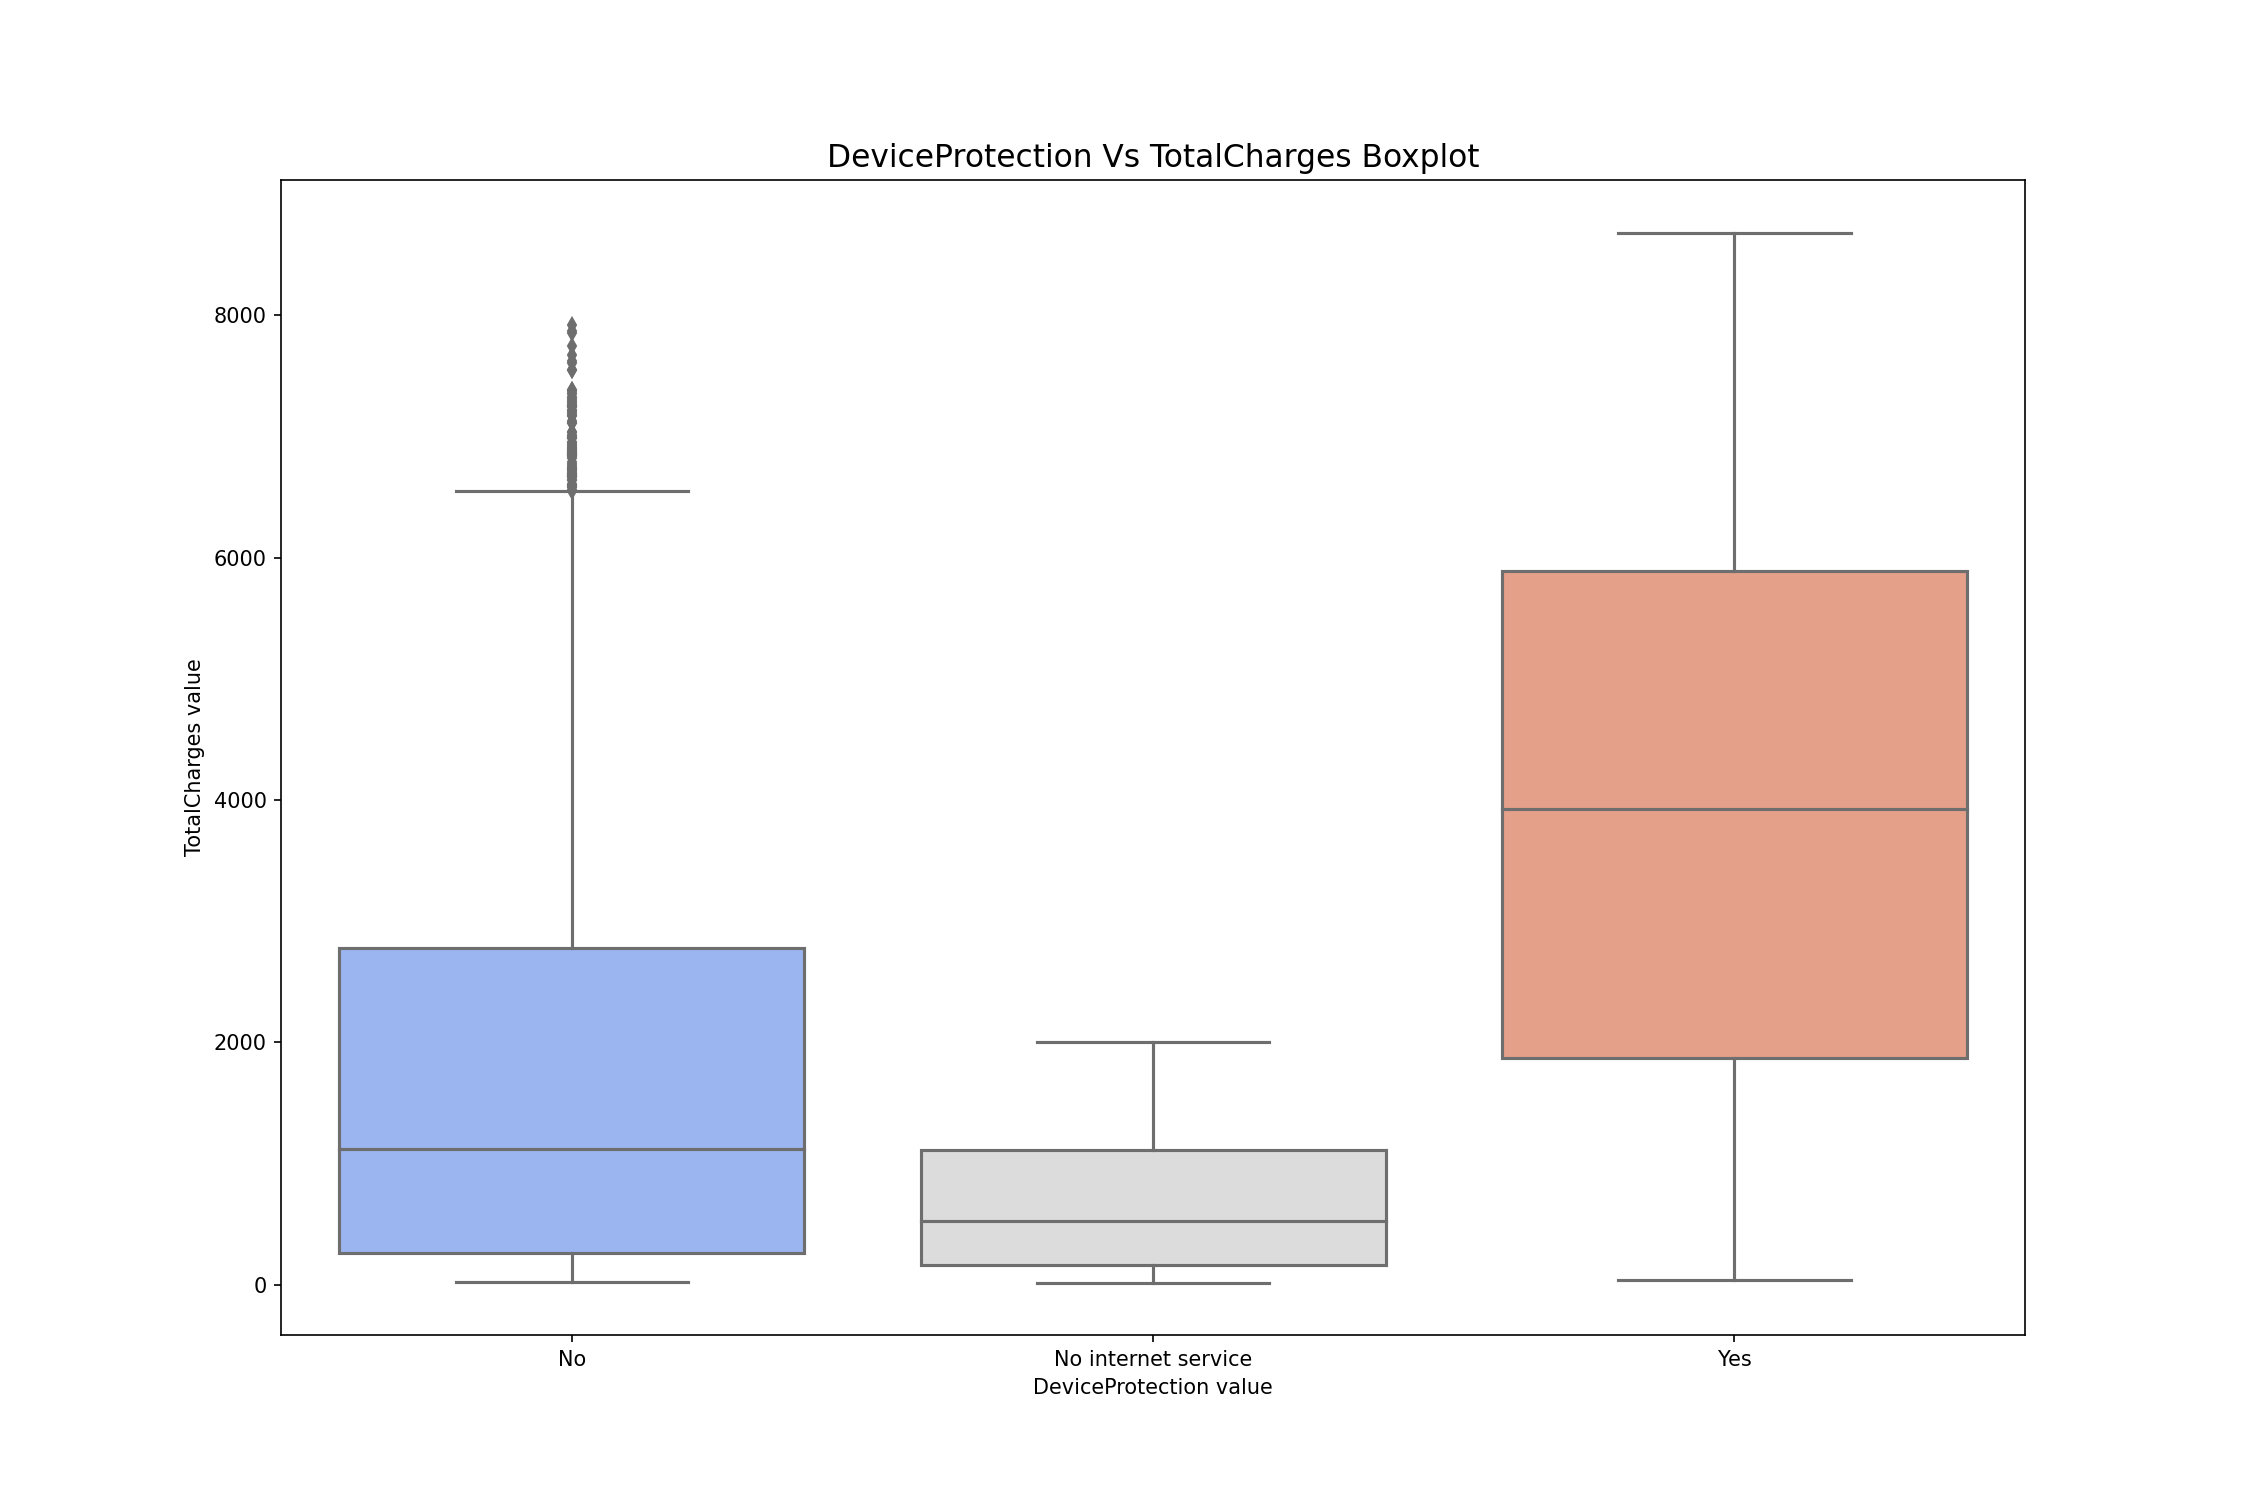

In [ ]:
boxplot_function(dataframe=telecom_data,x_value="DeviceProtection",y_value="TotalCharges",palette="coolwarm")
plt.show()